In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from math import log10
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import os
import re
from nltk import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from common.utils import split_to_words, split_to_sentences

In [2]:
train_dir = os.path.realpath("../assets/annotated-corpus/train")
result_dir = os.path.realpath("../assets/wordcount/train")

In [3]:
topics = os.listdir(train_dir)
topics

['4', '3', '1', '2']

# Task 1

In [4]:
def get_sentence_stems_processed(filepath):
    sentences = []
    pattern = r"([A-Za-z]+[-.@]?)+\w*\.?"
    with open(filepath) as f:
        lines = "".join(f.readlines())
        sentences_raw = lines.split("\n\n")
        for sentence in sentences_raw:
            stems = []
            words = sentence.split("\n")
            if len(words) == 0 or words[0] == "":
                continue
            stems_raw = list(map(lambda x: x.split("\t")[1], words))
            lemmas = list(map(lambda x: x.split("\t")[2], words))
            for i in range(len(stems_raw)):
                if lemmas[i] not in stopwords.words("english") and re.match(pattern, lemmas[i]) is not None:
                    stems.append(stems_raw[i])
            sentences.append(stems)
    return sentences

In [5]:
def count_words_in_sentences(sentences, count_by_sentences=False):
    word_count = {}
    sentences_count = []
    for sentence in sentences:
        wbs_count = {}
        for word in sentence:
            if word not in wbs_count.keys():
                wbs_count[word] = 0
            wbs_count[word] += 1
            if word not in word_count.keys():
                word_count[word] = 0
            word_count[word] += 1
        sentences_count.append(wbs_count)
    return sentences_count if count_by_sentences else word_count

In [6]:
all_documents = []
word_dict_raw = {}
counter = 0
total_len = 0
for topic in topics:
    total_len += len(os.listdir(os.path.join(train_dir, topic)))
print(f"Total files for process: {total_len}")

for topic in topics:
    workdir = os.path.join(train_dir, topic)
    start_time = datetime.datetime.now()
    for filename in os.listdir(workdir):
        stems = get_sentence_stems_processed(os.path.join(workdir, filename))
        all_documents.append(stems)
        counts = count_words_in_sentences(stems)
        for word in counts.keys():
            if word not in word_dict_raw.keys():
                word_dict_raw[word] = 0
            word_dict_raw[word] += counts[word]
        counter += 1
        if counter % 1000 == 0:
            print(f"Processed {counter} files. 1000 files per: {(datetime.datetime.now() - start_time).total_seconds()}s")
            start_time = datetime.datetime.now()

Total files for process: 120000
Processed 1000 files. 1000 files per: 2.222817s
Processed 2000 files. 1000 files per: 2.24552s
Processed 3000 files. 1000 files per: 2.206166s
Processed 4000 files. 1000 files per: 2.26358s
Processed 5000 files. 1000 files per: 2.279962s
Processed 6000 files. 1000 files per: 2.25972s
Processed 7000 files. 1000 files per: 2.235664s
Processed 8000 files. 1000 files per: 2.222988s
Processed 9000 files. 1000 files per: 2.283344s
Processed 10000 files. 1000 files per: 2.206858s
Processed 11000 files. 1000 files per: 2.20775s
Processed 12000 files. 1000 files per: 2.277648s
Processed 13000 files. 1000 files per: 2.202845s
Processed 14000 files. 1000 files per: 2.272038s
Processed 15000 files. 1000 files per: 2.228991s
Processed 16000 files. 1000 files per: 2.260327s
Processed 17000 files. 1000 files per: 2.193258s
Processed 18000 files. 1000 files per: 2.195531s
Processed 19000 files. 1000 files per: 2.219582s
Processed 20000 files. 1000 files per: 2.247261s
P

In [7]:
word_dict = dict(word_dict_raw)

for word in word_dict_raw.keys():
    if word_dict_raw[word] < 3:
        del word_dict[word]

In [8]:
if not os.path.isdir(result_dir):
    os.makedirs(result_dir, exist_ok=True)
with open(os.path.join(result_dir, "dictionary.json"), "w") as f:
    json.dump(word_dict, f, indent=1)

In [9]:
doc_names = []
matrix_arr = []
cnt = 0
for topic in topics:
    workdir = os.path.join(train_dir, topic)
    start_time = datetime.datetime.now()
    for filename in os.listdir(workdir):
        doc_names.append(topic + "/" + filename)
        stems = get_sentence_stems_processed(os.path.join(workdir, filename))
        counts = count_words_in_sentences(stems)
        vec = []
        for word in word_dict.keys():
            if word in counts.keys():
                vec.append(counts[word])
            else:
                vec.append(0)
        matrix_arr.append(vec)
        if sum(vec) == 0:
            print("Zero vector for document", filename)
        cnt += 1
        if cnt % 1000 == 0:
            print(f"Processed {cnt} files. 1000 Files Per: {(datetime.datetime.now() - start_time).total_seconds()}s")
            start_time = datetime.datetime.now()

Processed 1000 files. 1000 Files Per: 5.93207s
Processed 2000 files. 1000 Files Per: 5.352863s
Processed 3000 files. 1000 Files Per: 5.246312s
Processed 4000 files. 1000 Files Per: 5.510729s
Processed 5000 files. 1000 Files Per: 5.408857s
Processed 6000 files. 1000 Files Per: 5.609525s
Processed 7000 files. 1000 Files Per: 5.317881s
Processed 8000 files. 1000 Files Per: 5.349153s
Processed 9000 files. 1000 Files Per: 5.307789s
Processed 10000 files. 1000 Files Per: 5.306511s
Processed 11000 files. 1000 Files Per: 5.373819s
Processed 12000 files. 1000 Files Per: 5.426513s
Processed 13000 files. 1000 Files Per: 5.390206s
Processed 14000 files. 1000 Files Per: 5.860162s
Processed 15000 files. 1000 Files Per: 6.700008s
Processed 16000 files. 1000 Files Per: 5.456767s
Processed 17000 files. 1000 Files Per: 5.350818s
Processed 18000 files. 1000 Files Per: 5.608322s
Processed 19000 files. 1000 Files Per: 5.252519s
Processed 20000 files. 1000 Files Per: 5.415826s
Processed 21000 files. 1000 Fi

In [10]:
m_len = len(matrix_arr)
m_1 = pd.DataFrame(matrix_arr[:int(m_len/4)])
m_1.columns = word_dict.keys()
m_1.index = doc_names[:int(m_len/4)]

In [11]:
m_1.to_csv(os.path.join(result_dir, "term-document.csv"))

In [12]:
# m_len = len(matrix_arr)
# m_1 = pd.DataFrame(matrix_arr[int(3*m_len/4):])
# m_1.columns = word_dict.keys()
# m_1.index = doc_names[int(3*m_len/4):]
# m_1.to_csv(os.path.join(result_dir, "term-document.csv"), mode="a", header=False)

In [13]:
# matrix = pd.DataFrame(matrix_arr)
# matrix.columns = word_dict.keys()
# matrix.index = doc_names

In [14]:
# matrix.to_csv(os.path.join(result_dir, "term-document.csv"))

# Task 2

In [15]:
def tf_idf(words, matrix):
    total_words = sum(words.values())
    total_documents = len(matrix.index)
    result = []
    for w in matrix.columns:
        if w not in words:
            result.append(0.0)
            continue
        t_f = words[w] / total_words
        d_f = sum(matrix[w] > 0)
        tfidf = t_f * (log10(total_documents + 1) - log10(d_f + 1))
        result.append(tfidf)
    return result

In [16]:
def preprocess_text(text, by_sentences=False):
    stemmer = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()
    sentences = split_to_sentences(text)
    result = []
    for s in sentences:
        sentence = []
        for w in split_to_words(s):
            w_processed = re.sub(r"[.!?,]$", "", w).lower()
            if lemmatizer.lemmatize(w_processed) not in stopwords.words("english"):
                sentence.append(stemmer.stem(w_processed))
        if by_sentences:
            result.append(sentence)
        else:
            result += sentence
    return result

In [17]:
def vectorize_tf_idf(text, matrix):
    preprocessed = preprocess_text(text)
    text_dict = count_words_in_sentences([preprocessed])
    return tf_idf(text_dict, matrix)

In [18]:
matrix = pd.read_csv(os.path.join(result_dir, "term-document.csv"), index_col=0)

In [19]:
matrix = m_1

In [20]:
t1 = """Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones
Christians stick on their cars, but with feet and the word "Darwin" written
inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US."""

In [21]:
t2 = """A story based on the premise that the US Congress is mysteriously
assassinated, and fundamentalists quickly take charge of the nation to set it
"right" again.  The book is the diary of a woman's life as she tries to live
under the new Christian theocracy.  Women's right to own property is revoked,
and their bank accounts are closed; sinful luxuries are outlawed, and the
radio is only used for readings from the Bible.  Crimes are punished
retroactively: doctors who performed legal abortions in the "old world" are
hunted down and hanged.  Atwood's writing style is difficult to get used to
at first, but the tale grows more and more chilling as it goes on."""

In [22]:
vectorize_tf_idf(t1, matrix)[:100]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.11483746296641734,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [23]:
vectorize_tf_idf(t2, matrix)[:100]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.012078994975029055,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.019981997692395052,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03772109750323365,
 0.0,
 0.0,
 0.0,
 0.0,
 0.023446846601057513,
 0.0,
 0.0]

# Task 3

In [24]:
w2v = Word2Vec(sentences=[sentence for document in all_documents for sentence in document], epochs=40)
w2v.save(os.path.join(train_dir, "..", "w2v_weights"))

In [25]:
w2v.wv.most_similar("christian")

[('vieri', 0.4994616210460663),
 ('cathol', 0.49830296635627747),
 ('righteous', 0.49432772397994995),
 ('chesnot', 0.4816053509712219),
 ('thinker', 0.4694572389125824),
 ('canterburi', 0.465934157371521),
 ('devout', 0.4655701220035553),
 ('mandela', 0.4594581127166748),
 ('moreno', 0.4499610364437103),
 ('malbrunot', 0.44093361496925354)]

# Task 4

In [26]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [27]:
cosine_similarity(w2v.wv["christian"], w2v.wv["politician"])

0.36901003

In [28]:
def draw_words(terms, vectors_source):
    pca = PCA(n_components=2)
    vectors_2d = pd.DataFrame(pca.fit_transform([vectors_source[term] for term in terms]))
    vectors_2d.index = terms
    vectors_2d.columns = ["x", "y"]
    p = sns.scatterplot(data=vectors_2d, x="x", y="y")

    for i in vectors_2d.index:
        item = vectors_2d.loc[i]
        p.text(item.x, item.y, i)
    return p

<Axes: xlabel='x', ylabel='y'>

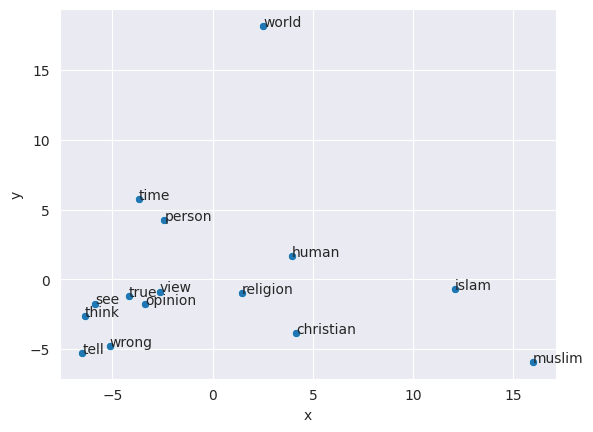

In [29]:
terms_to_check = ["christian", "muslim", "islam", "time", "world", "true",
                  "wrong", "human", "person", "tell", "see", "opinion", "think", "view", "religion"]
draw_words(terms_to_check, w2v.wv)

# Task 5

In [30]:
def transform_to_compare(vectors):
    pca = PCA(n_components=len(w2v.wv[0]))
    transformed = pca.fit_transform(vectors)
    return transformed

In [31]:
terms_vectorized = [vectorize_tf_idf(i, matrix) for i in matrix.columns]

# Task 6

In [32]:
to_cmp = transform_to_compare(terms_vectorized)

In [33]:
terms_to_compare = pd.DataFrame(to_cmp)
terms_to_compare.index = matrix.columns

In [34]:
def compare_methods(w1, w2):
    print("Results for words", w1, "and", w2)
    print("W2V:", cosine_similarity(w2v.wv[w1], w2v.wv[w2]))
    print("Tf-Idf:", cosine_similarity(terms_to_compare.loc[w1], terms_to_compare.loc[w2]))
    print()

In [35]:
compare_methods("time", "muslim")
compare_methods("say", "tell")
compare_methods("person", "time")

Results for words time and muslim
W2V: -0.09740019
Tf-Idf: 0.023208958242210708

Results for words say and tell
W2V: 0.67108303
Tf-Idf: 0.9996644686250618

Results for words person and time
W2V: 0.2013097
Tf-Idf: 0.9999794536820122


In [36]:
tfidf_data = {}
for i in range(len(matrix.columns)):
    tfidf_data[matrix.columns[i]] = terms_vectorized[i]

<Axes: xlabel='x', ylabel='y'>

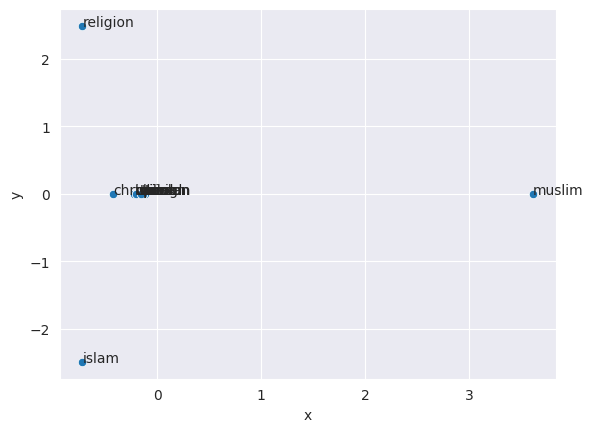

In [37]:
draw_words(terms_to_check, tfidf_data)

# Task 7

In [38]:
def vectorize(sentences, w2v):
    result_vec = np.zeros(w2v.vector_size)
    for s in sentences:
        sentence_vec = np.zeros(w2v.vector_size)
        for w in s:
            if w2v.wv.has_index_for(w):
                sentence_vec += w2v.wv[w]
        sentence_vec = sentence_vec / len(s) if len(s) > 0 else np.zeros(w2v.vector_size)
        result_vec += sentence_vec
    result_vec = result_vec / len(sentences) if len(sentences) > 0 else np.zeros(w2v.vector_size)
    return result_vec

In [39]:
preprocess_text(t1, True)

[['evolut',
  'design',
  'sell',
  'darwin',
  'fish',
  'fish',
  'symbol',
  'like',
  'one'],
 ['christian',
  'stick',
  'car',
  'feet',
  'word',
  'darwin',
  'written',
  'insid',
  'delux',
  'mould',
  '3d',
  'plastic',
  'fish',
  '4',
  '95',
  'postpaid',
  'us']]

In [40]:
vectorize(preprocess_text(t1, True), w2v)

array([-0.09253543, -0.11763319, -0.31523757, -0.60454736, -0.2001412 ,
       -0.054317  , -0.64869795, -0.09061898, -0.44987102, -0.19952022,
       -0.20973961,  0.37395   ,  0.21356605, -0.69897042,  0.97281452,
        0.18087294,  0.03399781, -0.74280384, -0.03253715,  0.65083814,
       -0.01342744, -0.16917939,  0.75513106,  0.29827508, -0.3007109 ,
        1.06502611, -0.44067597,  0.27950331,  0.46658102,  0.18858784,
       -0.30920152,  0.2765174 ,  0.46167909,  0.5395272 , -0.22917131,
        0.1438764 ,  0.35972917, -0.60268811, -0.09008428, -0.11472524,
       -0.19736995,  0.62815683, -0.16253192,  0.91182862, -0.00880029,
        0.38478401,  0.39391567,  0.12144019,  0.40593818,  0.8481242 ,
       -0.43128024,  0.87571935,  0.00752497,  0.48076191, -0.42312132,
       -0.6624084 , -0.32893277,  0.05545178, -0.20344505, -0.69656316,
        0.17372733, -0.71163091, -0.3441059 ,  0.03300215, -0.59889189,
        0.03316073, -0.46034735,  0.13815299,  0.18043963,  0.57

 # Task 8

In [41]:
w2v = Word2Vec.load(os.path.join(train_dir, "..", "w2v_weights"))
vectorized_documents = {}
for topic in topics:
    workdir = os.path.join(train_dir, topic)
    for filename in os.listdir(workdir):
        stems = get_sentence_stems_processed(os.path.join(workdir, filename))
        vectorized_documents[os.path.join(topic, filename)] = vectorize(stems, w2v)

In [42]:
with open(os.path.join(train_dir, "..", "train_embeddings.tsv"), "w") as f:
    for k in vectorized_documents.keys():
        print(k.replace(".tsv", ""), *vectorized_documents[k], sep="\t", file=f)

In [43]:
test_dir = os.path.realpath("../assets/annotated-corpus/test")
vectorized_documents = {}
for topic in topics:
    workdir = os.path.join(test_dir, topic)
    for filename in os.listdir(workdir):
        stems = get_sentence_stems_processed(os.path.join(workdir, filename))
        vectorized_documents[os.path.join(topic, filename)] = vectorize(stems, w2v)

In [44]:
with open(os.path.join(train_dir, "..", "test_embeddings.tsv"), "w") as f:
    for k in vectorized_documents.keys():
        print(k.replace(".tsv", ""), *vectorized_documents[k], sep="\t", file=f)